In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import mean_squared_error
import os
import datetime
#from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.tools.tools as stt
import plotly.graph_objs as go
from vecstack import stacking
import xgboost
import plotly.graph_objs as go
import plotly.offline as py
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

# os.chdir("C:/Users/Common/Desktop/Google Drive/NUS/Semester 2/BT5153-Applied Machine Learning/Group Project/From Microsoft Team/Dataset")

Using TensorFlow backend.


In [2]:
df=pd.read_csv("listings_final.csv")

In [3]:
df.head()

,picture_url,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,availability_30,review_scores_rating,...,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,month_2019-04-01,month_2019-05-01,month_2019-06-01,month_2019-07-01,month_2019-08-01,month_2019-09-01,month_2019-10-01,month_2019-11-01
0,https://a0.muscache.com/im/pictures/24485541/6...,1,1.0,1,1,0,0,1,30,94,...,0,0,0,0,0,0,0,0,0,0
1,https://a0.muscache.com/im/pictures/36342984/6...,2,1.0,1,1,0,0,2,30,91,...,0,0,0,0,0,0,0,0,0,0
2,https://a0.muscache.com/im/pictures/20783922/1...,1,1.0,1,1,0,0,1,30,98,...,0,0,0,0,0,0,0,0,0,0
3,https://a0.muscache.com/im/pictures/24453191/3...,6,1.0,2,3,271,54,4,27,80,...,0,0,0,0,0,0,0,0,0,0
4,https://a0.muscache.com/im/pictures/2440674/ac...,3,0.5,1,1,135,27,1,27,80,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(44025, 43)

In [5]:
df.columns = df.columns.str.replace('-', '_')

In [6]:
df=df.drop(['picture_url'],axis=1)

In [7]:
X = df.drop(['price'],axis=1)
y = df['price']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=10)

In [9]:
train, test= train_test_split(df, test_size=0.2, random_state=10)

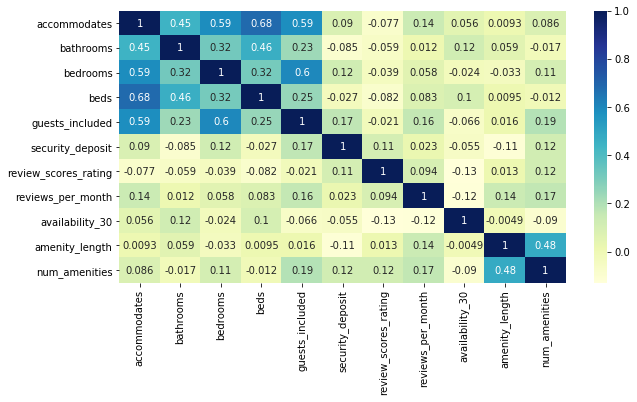

In [10]:
plt.figure(figsize=(10, 5))
sns.heatmap(X[['accommodates','bathrooms','bedrooms','beds','guests_included','security_deposit',
               'review_scores_rating','reviews_per_month','availability_30','amenity_length','num_amenities']].corr(),annot=True,cmap="YlGnBu")

# Run The Model

### Linear Regression

#### OLS

In [11]:
x_col=list(X)
modeleq = 'price' + ' ~'
for x in x_col:
    if modeleq[-1] == '~':
        modeleq = modeleq + ' ' + x
    else:
        modeleq = modeleq + ' + ' + x
print(modeleq)

price ~ accommodates + bathrooms + bedrooms + beds + security_deposit + cleaning_fee + guests_included + availability_30 + review_scores_rating + reviews_per_month + num_amenities + amenity_length + tot_arrival + host_is_superhost_t + neighbourhood_group_cleansed_East_Region + neighbourhood_group_cleansed_North_Region + neighbourhood_group_cleansed_North_East_Region + neighbourhood_group_cleansed_West_Region + property_type_Condominium + property_type_Hostel + property_type_House + property_type_Serviced_apartment + property_type_others + room_type_Hotel_room + room_type_Private_room + room_type_Shared_room + bed_type_Futon + bed_type_Pull_out_Sofa + bed_type_Real_Bed + cancellation_policy_moderate + cancellation_policy_strict + cancellation_policy_strict_14_with_grace_period + cancellation_policy_super_strict_30 + month_2019_04_01 + month_2019_05_01 + month_2019_06_01 + month_2019_07_01 + month_2019_08_01 + month_2019_09_01 + month_2019_10_01 + month_2019_11_01


In [12]:
MultiRegmodel = smf.ols(modeleq,train).fit()
print(MultiRegmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2042.
Date:                Wed, 22 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:11:35   Log-Likelihood:                -16659.
No. Observations:               35220   AIC:                         3.340e+04
Df Residuals:                   35179   BIC:                         3.375e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [13]:
y_pred0= MultiRegmodel.predict(test[x_col])

In [14]:
R2 = r2_score(test['price'], y_pred0)
MAE = mean_absolute_error(test['price'], y_pred0)
MSE = mean_squared_error(test['price'], y_pred0)
print('R2:', R2) 
print('MAE: ',MAE)
print('MSE:', MSE)

R2: 0.6972581238063106
MAE:  0.2945220896193302
MSE: 0.1531085246590476


**remove features with high p-value (p>0.05)**

In [15]:
df_reduce=df.drop(['security_deposit','property_type_House',
                   'bed_type_Futon','bed_type_Pull_out_Sofa','bed_type_Real_Bed',
                'cancellation_policy_strict'],axis=1)

In [16]:
X_reduce=df_reduce.drop(['price'],axis=1)
x_col_reduce=list(X_reduce)
modeleq_1 = 'price' + ' ~'
for x in x_col_reduce:
    if modeleq_1[-1] == '~':
        modeleq_1 = modeleq_1 + ' ' + x
    else:
        modeleq_1 = modeleq_1 + ' + ' + x
print(modeleq_1)

price ~ accommodates + bathrooms + bedrooms + beds + cleaning_fee + guests_included + availability_30 + review_scores_rating + reviews_per_month + num_amenities + amenity_length + tot_arrival + host_is_superhost_t + neighbourhood_group_cleansed_East_Region + neighbourhood_group_cleansed_North_Region + neighbourhood_group_cleansed_North_East_Region + neighbourhood_group_cleansed_West_Region + property_type_Condominium + property_type_Hostel + property_type_Serviced_apartment + property_type_others + room_type_Hotel_room + room_type_Private_room + room_type_Shared_room + cancellation_policy_moderate + cancellation_policy_strict_14_with_grace_period + cancellation_policy_super_strict_30 + month_2019_04_01 + month_2019_05_01 + month_2019_06_01 + month_2019_07_01 + month_2019_08_01 + month_2019_09_01 + month_2019_10_01 + month_2019_11_01


In [17]:
train_1, test_1= train_test_split(df_reduce,test_size=0.2, random_state=10)
MultiRegmodel_reduce = smf.ols(modeleq_1,train_1).fit()
print(MultiRegmodel_reduce.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2401.
Date:                Wed, 22 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:11:49   Log-Likelihood:                -16670.
No. Observations:               35220   AIC:                         3.341e+04
Df Residuals:                   35185   BIC:                         3.371e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [18]:
y_pred0_reduce= MultiRegmodel_reduce.predict(test_1[x_col_reduce])

In [19]:
R2 = r2_score(test_1['price'], y_pred0_reduce)
MAE = mean_absolute_error(test_1['price'], y_pred0_reduce)
MSE = mean_squared_error(test_1['price'], y_pred0_reduce)
print('R2:', R2) 
print('MAE: ',MAE)
print('MSE:', MSE)

R2: 0.6971402965720724
MAE:  0.2945291529073281
MSE: 0.1531681145454078


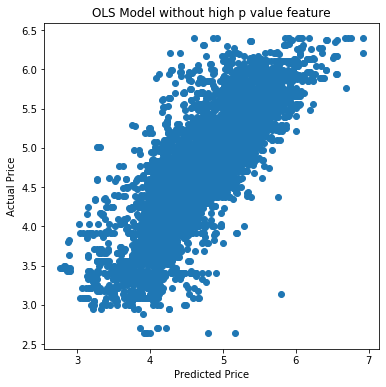

In [20]:
plt.figure(figsize=(6, 6))
plt.scatter( y_pred0_reduce,test_1['price'])
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('OLS Model without high p value feature')
plt.show()

#### Stepwise Forward variable Selection Multiple Regression

In [21]:
select=[]
for x in x_col:
    select.append(x)

In [22]:
len(x_col)

41

In [23]:
select=[]
current=[]
RMSE=10000
for x in x_col:
    select.append(x)
    reg = LinearRegression().fit(X_train[select], y_train)
    pred_y=reg.predict(X_test[select])
    rmse_test=np.sqrt(mean_squared_error(y_test, pred_y))
    print(select)
    print(rmse_test)
    if rmse_test<RMSE:
        RMSE=rmse_test
#         current=select
        print(RMSE)
    else:
#         select=current
        select=select[:-1]

['accommodates']
0.6476176831437825
0.6476176831437825
['accommodates', 'bathrooms']
0.6297070982097076
0.6297070982097076
['accommodates', 'bathrooms', 'bedrooms']
0.5865714164144428
0.5865714164144428
['accommodates', 'bathrooms', 'bedrooms', 'beds']
0.5685707006979538
0.5685707006979538
['accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit']
0.553245901633745
0.553245901633745
['accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee']
0.5439491249385822
0.5439491249385822
['accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included']
0.5256277337753202
0.5256277337753202
['accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'availability_30']
0.5252135214341728
0.5252135214341728
['accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'availability_30', 'review_scores_rating']
0.5231251607414099
0.52312

['accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'availability_30', 'review_scores_rating', 'reviews_per_month', 'num_amenities', 'amenity_length', 'host_is_superhost_t', 'neighbourhood_group_cleansed_East_Region', 'neighbourhood_group_cleansed_North_Region', 'neighbourhood_group_cleansed_North_East_Region', 'neighbourhood_group_cleansed_West_Region', 'property_type_Condominium', 'property_type_Hostel', 'property_type_House', 'property_type_Serviced_apartment', 'property_type_others', 'room_type_Hotel_room', 'room_type_Private_room', 'room_type_Shared_room', 'bed_type_Futon', 'bed_type_Pull_out_Sofa', 'bed_type_Real_Bed']
0.3942263670928198
0.3942263670928198
['accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'availability_30', 'review_scores_rating', 'reviews_per_month', 'num_amenities', 'amenity_length', 'host_is_superhost_t', 'neighbourhood_group_cleansed_East_Region', 'neig

['accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'availability_30', 'review_scores_rating', 'reviews_per_month', 'num_amenities', 'amenity_length', 'host_is_superhost_t', 'neighbourhood_group_cleansed_East_Region', 'neighbourhood_group_cleansed_North_Region', 'neighbourhood_group_cleansed_North_East_Region', 'neighbourhood_group_cleansed_West_Region', 'property_type_Condominium', 'property_type_Hostel', 'property_type_House', 'property_type_Serviced_apartment', 'property_type_others', 'room_type_Hotel_room', 'room_type_Private_room', 'room_type_Shared_room', 'bed_type_Futon', 'bed_type_Pull_out_Sofa', 'bed_type_Real_Bed', 'cancellation_policy_strict', 'cancellation_policy_strict_14_with_grace_period', 'cancellation_policy_super_strict_30', 'month_2019_05_01', 'month_2019_08_01', 'month_2019_09_01', 'month_2019_11_01']
0.391734499403018


In [24]:
len(select)

34

In [25]:
select

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'availability_30',
 'review_scores_rating',
 'reviews_per_month',
 'num_amenities',
 'amenity_length',
 'host_is_superhost_t',
 'neighbourhood_group_cleansed_East_Region',
 'neighbourhood_group_cleansed_North_Region',
 'neighbourhood_group_cleansed_North_East_Region',
 'neighbourhood_group_cleansed_West_Region',
 'property_type_Condominium',
 'property_type_Hostel',
 'property_type_House',
 'property_type_Serviced_apartment',
 'property_type_others',
 'room_type_Hotel_room',
 'room_type_Private_room',
 'room_type_Shared_room',
 'bed_type_Futon',
 'bed_type_Pull_out_Sofa',
 'bed_type_Real_Bed',
 'cancellation_policy_strict',
 'cancellation_policy_strict_14_with_grace_period',
 'cancellation_policy_super_strict_30',
 'month_2019_05_01',
 'month_2019_08_01',
 'month_2019_09_01']

In [26]:
final_model = LinearRegression().fit(X_train[select], y_train)
pred_y=final_model.predict(X_test[select])

In [27]:
R2 = r2_score(test_1['price'], pred_y)
MAE = mean_absolute_error(test_1['price'], pred_y)
MSE = mean_squared_error(test_1['price'], pred_y)
print('R2:', R2) 
print('MAE: ',MAE)
print('MSE:', MSE)

R2: 0.6966071706665847
MAE:  0.29460309790711986
MSE: 0.15343773737351804


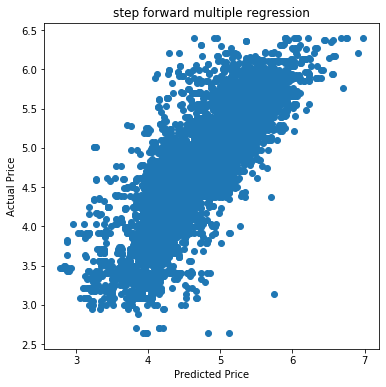

In [28]:
plt.figure(figsize=(6, 6))
plt.scatter (pred_y,y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('step forward multiple regression')
plt.show()

### Deep Learning: CNN

In [61]:
X_train_cnn = X_train.copy()
X_test_cnn = X_test.copy()
y_train_cnn = y_train.copy()
y_test_cnn = y_test.copy()

In [62]:
# Feature Scaling
sc = StandardScaler()
X_train_cnn = sc.fit_transform(X_train_cnn)
X_test_cnn = sc.transform(X_test_cnn)

In [63]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = X_train_cnn.shape[1]))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

In [64]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [65]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 32)                1344      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.fit(X_train_cnn, y_train_cnn, batch_size = 10, epochs = 10)

Epoch 1/10
35220/35220 [==============================] - 5s 128us/step - loss: 0.4808
Epoch 2/10
35220/35220 [==============================] - 4s 119us/step - loss: 0.1291
Epoch 3/10
35220/35220 [==============================] - 4s 124us/step - loss: 0.1155
Epoch 4/10
35220/35220 [==============================] - 4s 112us/step - loss: 0.1077
Epoch 5/10
35220/35220 [==============================] - 4s 121us/step - loss: 0.1015
Epoch 6/10
35220/35220 [==============================] - 5s 132us/step - loss: 0.0959
Epoch 7/10
35220/35220 [==============================] - 5s 128us/step - loss: 0.0916
Epoch 8/10
35220/35220 [==============================] - 4s 126us/step - loss: 0.0870
Epoch 9/10
35220/35220 [==============================] - 4s 125us/step - loss: 0.0826
Epoch 10/10
35220/35220 [==============================] - 4s 127us/step - loss: 0.0803


In [67]:
y_pred = model.predict(X_test_cnn)

In [70]:
y_pred3

array([4.635646 , 4.6101155, 5.6259937, ..., 3.4880667, 5.9749327,
       4.4595037], dtype=float32)

In [73]:
y_pred3 = np.reshape(y_pred,(X_test_cnn.shape[0]))
y_test3 = np.reshape(y_test,(X_test_cnn.shape[0]))

In [71]:
y_pred.shape

(8805, 1)

In [74]:
R2 = r2_score(y_test3, y_pred3)
MAE = mean_absolute_error(y_test3, y_pred3)
MSE = mean_squared_error(y_test3, y_pred3)
print('R2:', R2) 
print('MAE: ',MAE)
print('MSE:', MSE)

R2: 0.842638270661143
MAE:  0.20928221211233872
MSE: 0.07958404208823153


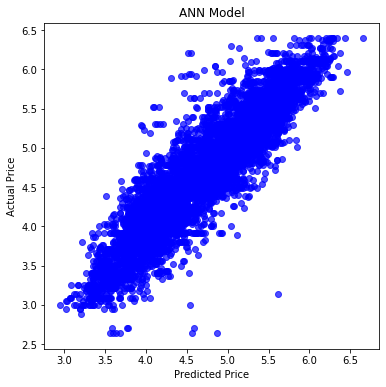

In [77]:
plt.figure(figsize=(6, 6))
plt.scatter( y_pred3,y_test3, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('ANN Model')
plt.show()

# Ensemble and Regression Model (Without Hyperparameter Tuning)

In [11]:
rf = RandomForestRegressor(random_state = 10)
gb = GradientBoostingRegressor(random_state = 10)
xgb = xgboost.XGBRegressor(random_state = 10)

In [12]:
models = [rf,gb,xgb]
model_train_score = []
model_R2 = []
model_MAE = []
model_MSE = []

In [13]:
%%time
for model in models:
    model.fit(X_train, y_train)
    model_train_score.append(model.score(X_train, y_train))
    
    y_pred = model.predict(X_test)
    model_R2.append(r2_score(y_test, y_pred))
    model_MAE.append(mean_absolute_error(y_test, y_pred))
    model_MSE.append(mean_squared_error(y_test, y_pred))

Wall time: 1min 38s


In [14]:
model_train_score_df = pd.DataFrame(model_train_score, index=['RandomForestRegressor','GradientBoostingRegressor','XBoostRegressor'], columns=['Model Score'])
model_R2_df = pd.DataFrame(model_R2, index=['RandomForestRegressor','GradientBoostingRegressor','XBoostRegressor'], columns=['R Squared'])
model_MAE_df = pd.DataFrame(model_MAE, index=['RandomForestRegressor','GradientBoostingRegressor','XBoostRegressor'], columns=['Mean Absolute Error'])
model_MSE_df = pd.DataFrame(model_MSE, index=['RandomForestRegressor','GradientBoostingRegressor','XBoostRegressor'], columns=['Mean Squared Error'])

model_validation = pd.concat([model_train_score_df,model_R2_df,model_MAE_df,model_MSE_df], axis=1)
model_validation

,Model Score,R Squared,Mean Absolute Error,Mean Squared Error
RandomForestRegressor,0.996067,0.973274,0.054730,0.013517
GradientBoostingRegressor,0.801696,0.806911,0.231423,0.097653
XBoostRegressor,0.943574,0.927089,0.134297,0.036874


### Hyperparameter Tuning

#### GradientBoostingRegressor

In [15]:
gb_param_grid = {
    'max_depth': [3, 5],
    'min_samples_split': [2, 8],
    'n_estimators': [100, 400, 600]
}

In [16]:
gb_grid_search = GridSearchCV(estimator = gb, param_grid = gb_param_grid, cv = 5, n_jobs = -1, verbose = 3)

In [17]:
%%time
gb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 10.7min finished


Wall time: 13min


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [18]:
gb_grid_search.best_params_

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 600}

In [19]:
gb_grid_search = GradientBoostingRegressor(max_depth = 5, min_samples_split = 2, n_estimators = 600, random_state = 10)

In [22]:
gb_grid_search.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=600,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=10, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

#### XGBoostRegressor

In [23]:
xgb_param_grid = {
    'min_child_weight': [1, 2, 4],
    'max_depth': [3, 4, 6],
    'n_estimators': [100, 500] 
}

In [24]:
xgb_grid_search = GridSearchCV(estimator = xgb, param_grid = xgb_param_grid, cv = 5, n_jobs = -1, verbose = 3)

In [25]:
%%time
xgb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 14.3min finished


Wall time: 14min 47s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster=None,
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=0...
                                    objective='reg:squarederror',
                                    random_state=10, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method=None, validate_parameters=False,
                               

In [26]:
xgb_grid_search.best_params_

{'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 500}

### Stacking Ensemble and Regression Model (With Hyperparameter Tuning) 

In [27]:
models = [
    RandomForestRegressor(random_state = 10),
    GradientBoostingRegressor(max_depth = 5, min_samples_split = 2, n_estimators = 600, random_state = 10),
    xgboost.XGBRegressor(max_depth = 6, min_child_weight = 1, n_estimators = 500, random_state = 10)
]

In [28]:
%%time
S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=True, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
#                           metric=log_loss, 
    
                           n_folds=3, 
                 
#                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [regression]
metric:       [mean_absolute_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]
    fold  0:  [0.07525679]
    fold  1:  [0.07766800]
    fold  2:  [0.07593213]
    ----
    MEAN:     [0.07628564] + [0.00101561]
    FULL:     [0.07628564]

model  1:     [GradientBoostingRegressor]
    fold  0:  [0.13613374]
    fold  1:  [0.13829321]
    fold  2:  [0.13522626]
    ----
    MEAN:     [0.13655107] + [0.00128638]
    FULL:     [0.13655107]

model  2:     [XGBRegressor]
    fold  0:  [0.09211548]
    fold  1:  [0.09441802]
    fold  2:  [0.09414271]
    ----
    MEAN:     [0.09355873] + [0.00102671]
    FULL:     [0.09355873]

Wall time: 12min 18s


In [29]:
rf_tuned = RandomForestRegressor(random_state = 10)
gb_tuned = GradientBoostingRegressor(max_depth = 5, min_samples_split = 2, n_estimators = 600, random_state = 10)
xgb_tuned = xgboost.XGBRegressor(max_depth = 6, min_child_weight = 1, n_estimators = 500, random_state = 10)

models_tuned = [rf_tuned,gb_tuned,xgb_tuned]
model_train_score_tuned = []
model_R2_tuned = []
model_MAE_tuned = []
model_MSE_tuned = []

In [30]:
%%time
for model_tuned in models_tuned:
    model_tuned.fit(S_train, y_train)
    model_train_score_tuned.append(model_tuned.score(S_train, y_train))
    
    y_pred_tuned = model_tuned.predict(S_test)
    model_R2_tuned.append(r2_score(y_test, y_pred_tuned))
    model_MAE_tuned.append(mean_absolute_error(y_test, y_pred_tuned))
    model_MSE_tuned.append(mean_squared_error(y_test, y_pred_tuned))

Wall time: 1min 10s


In [31]:
model_train_score_tuned_df = pd.DataFrame(model_train_score_tuned, index=['RandomForestRegressor','GradientBoostingRegressor','XGBoostRegressor'], columns=['Model Score'])
model_R2_tuned_df = pd.DataFrame(model_R2_tuned, index=['RandomForestRegressor','GradientBoostingRegressor','XGBoostRegressor'], columns=['R Squared'])
model_MAE_tuned_df = pd.DataFrame(model_MAE_tuned, index=['RandomForestRegressor','GradientBoostingRegressor','XGBoostRegressor'], columns=['Mean Absolute Error'])
model_MSE_tuned_df = pd.DataFrame(model_MSE_tuned, index=['RandomForestRegressor','GradientBoostingRegressor','XGBoostRegressor'], columns=['Mean Squared Error'])

model_validation_tuned = pd.concat([model_train_score_tuned_df,model_R2_tuned_df,model_MAE_tuned_df,model_MSE_tuned_df], axis=1)
model_validation_tuned

,Model Score,R Squared,Mean Absolute Error,Mean Squared Error
RandomForestRegressor,0.994564,0.966616,0.071640,0.016884
GradientBoostingRegressor,0.980879,0.968062,0.067784,0.016152
XGBoostRegressor,0.990106,0.965500,0.072418,0.017448


### Feature Importance (With Hyperparameter Tuning)

In [32]:
%%time
rf_tuned.fit(X_train, y_train)
gb_tuned.fit(X_train, y_train)
xgb_tuned.fit(X_train, y_train)

Wall time: 1min 56s


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=10, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [33]:
rf_feature_tuned = rf_tuned.feature_importances_
gb_feature_tuned = gb_tuned.feature_importances_
xgb_feature_tuned = xgb_tuned.feature_importances_

In [34]:
cols = X_train.columns.values

In [35]:
feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importance': rf_feature_tuned,
     'Gradient Boost feature importance': gb_feature_tuned,
     'XGBoost feature importance': xgb_feature_tuned                              
    })

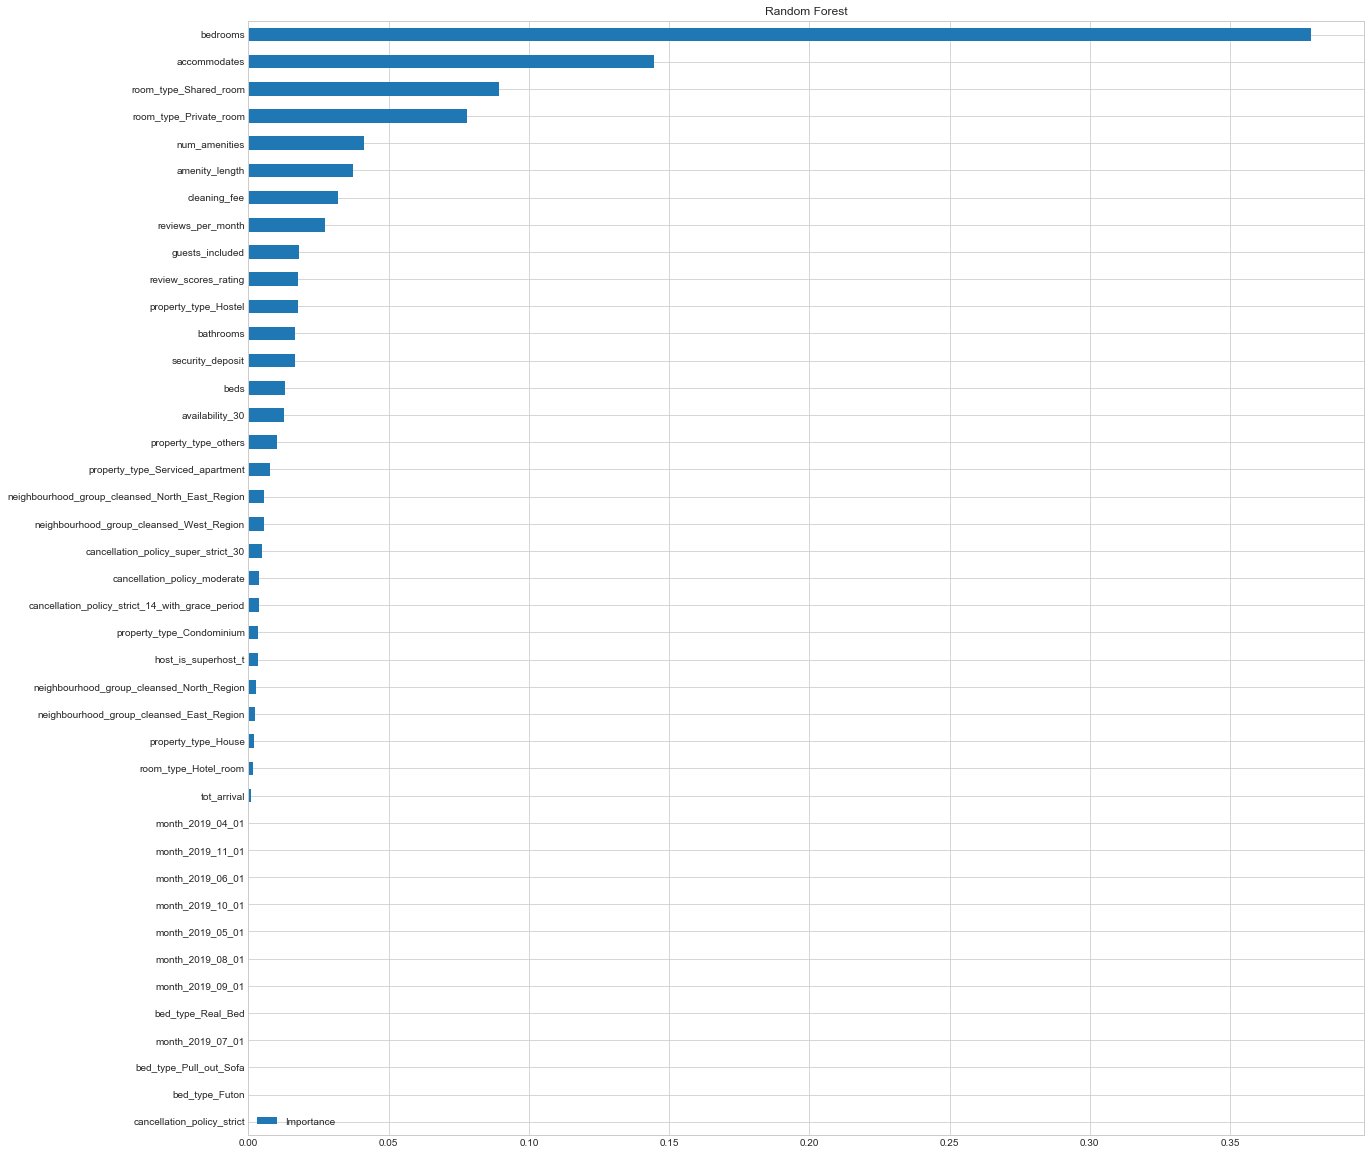

In [36]:
plt.style.use('seaborn-whitegrid')
importance = pd.DataFrame(rf_feature_tuned, index=X_train.columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(rf_feature_tuned)/2))
plt.title('Random Forest')
plt.show()

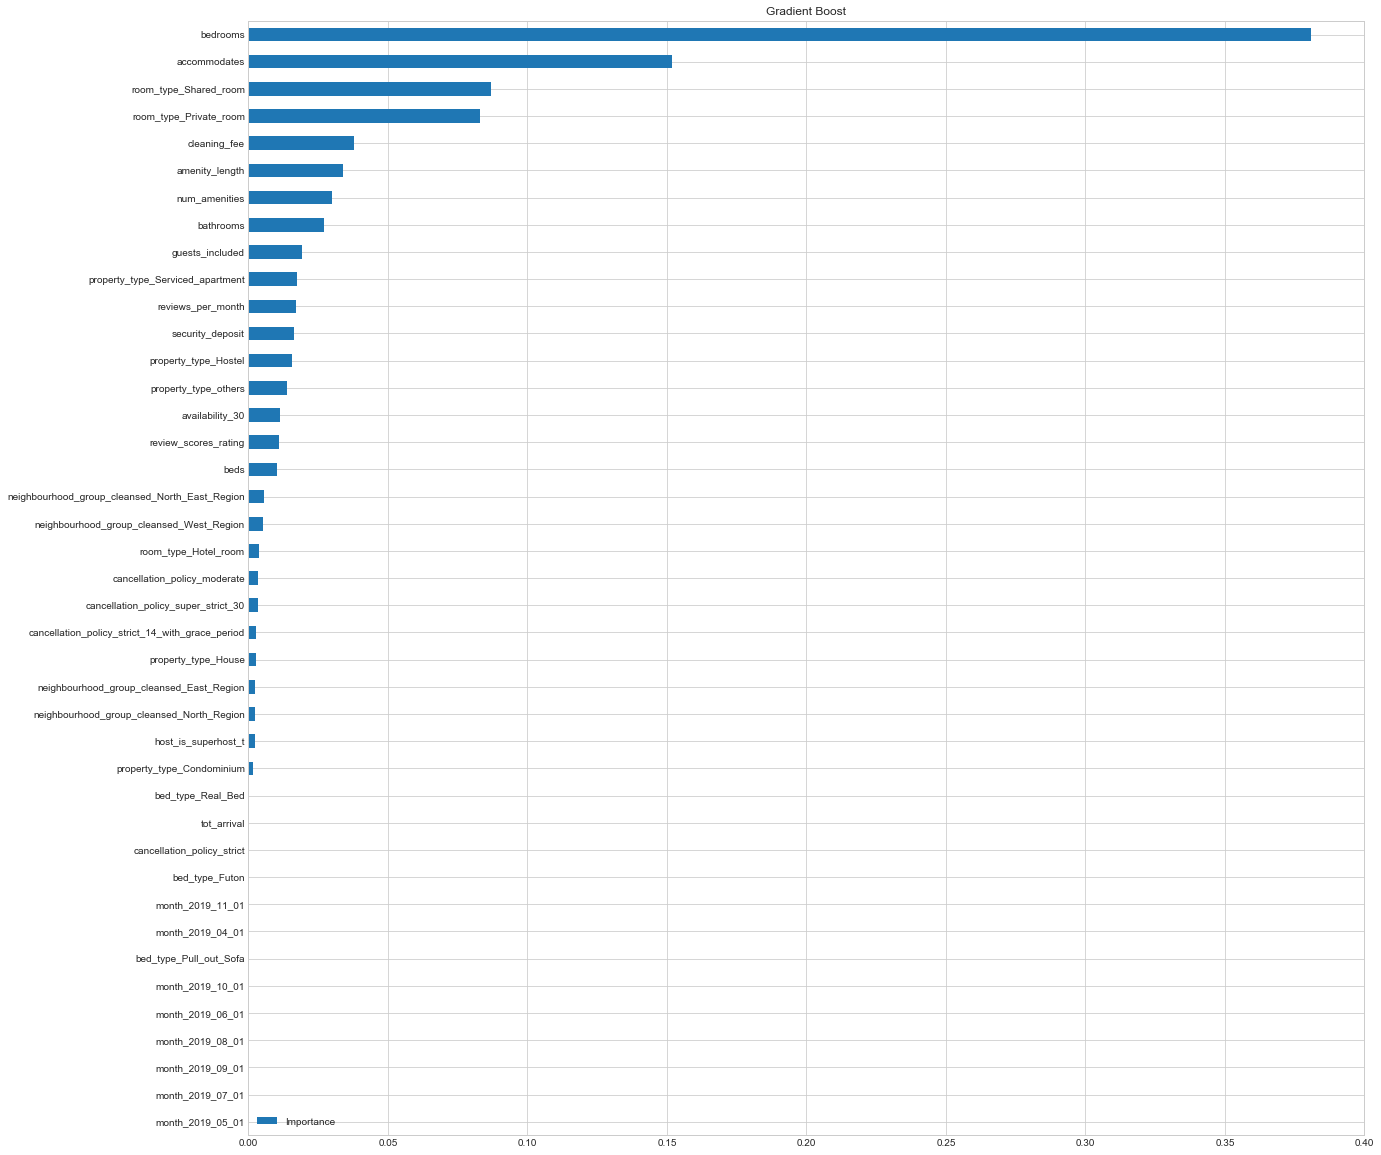

In [37]:
plt.style.use('seaborn-whitegrid')
importance = pd.DataFrame(gb_feature_tuned, index=X_train.columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(gb_feature_tuned)/2))
plt.title('Gradient Boost')
plt.show()

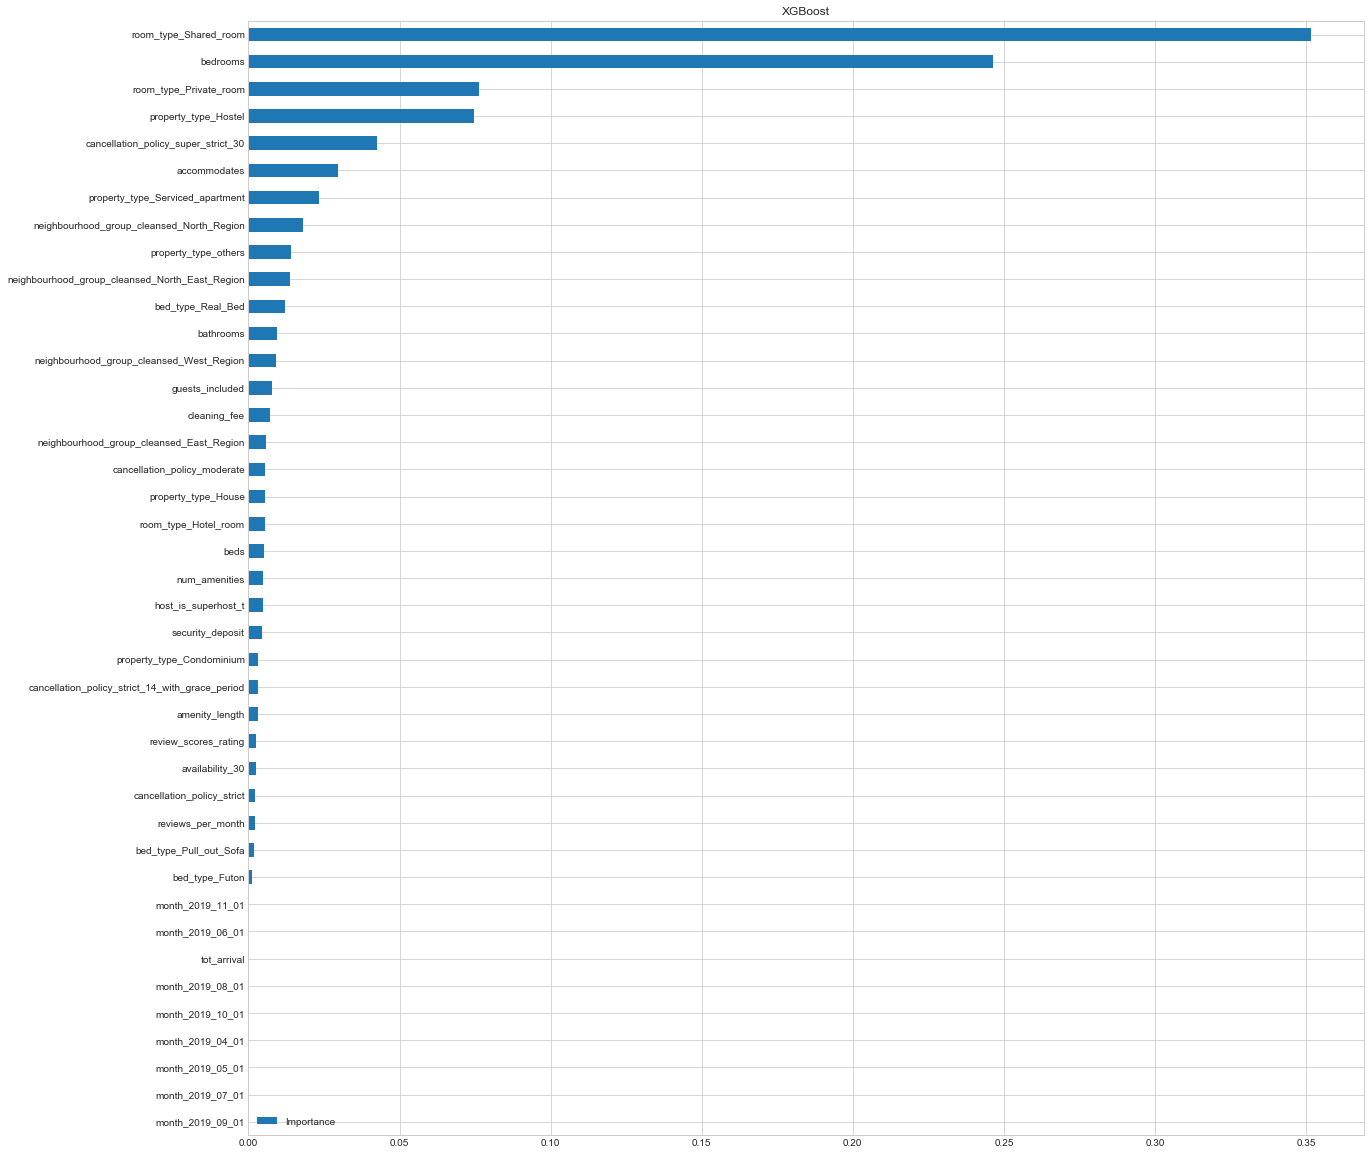

In [38]:
plt.style.use('seaborn-whitegrid')
importance = pd.DataFrame(xgb_feature_tuned, index=X_train.columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(xgb_feature_tuned)/2))
plt.title('XGBoost')
plt.show()